In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os



os.chdir('/content/drive/MyDrive/environment/전처리 데이터 ')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
os.listdir()

['최종_서울시_흡연구역.csv',
 '___서울시_어린이보호구역_어린이집_유치원.csv',
 '__서울특별시_초_중_고.csv',
 '__거리_50m_이내_구역.csv',
 '서울시 지하철호선별 역별 승하차 인원 정보.csv',
 'BUS_STATION_BOARDING_MONTH_202404.csv',
 'bus_info.xlsx',
 'df 통합.ipynb',
 '서울시 버스정류소 위치정보.csv',
 '서울시 학원 교습소정보.csv',
 '자치구별_흡연구역',
 '음식점_구_위도_경도.csv',
 '서울시 단란주점영업 인허가 정보.csv',
 '특정구_단란주점_정보.csv',
 '특정구_금연구역.csv',
 '특정구_흡연구역.csv',
 '어린이집_초중고_전체데이터.csv',
 '버스정류장_전처리.csv',
 '특정구_버스정류장.csv',
 '.ipynb_checkpoints',
 'traffic1.ipynb',
 '단란주점.ipynb',
 '특정구_학원.csv',
 'knn 어린이 초중고_흡연구역_맵핑.ipynb']

In [ ]:
pd.set_option('display.max_columns', None)
단란주점 = pd.read_csv('서울시 단란주점영업 인허가 정보.csv', encoding='cp949')
단란주점.columns

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수',
       '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모',
       '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')

In [ ]:
단란주점 = 단란주점[단란주점['영업상태명'] == 단란주점['영업상태명'].unique()[0]]

In [ ]:
단란주점 = 단란주점[['사업장명','업태구분명','소재지면적', '지번주소', '도로명주소']]
단란주점.reset_index(drop=True, inplace=True)

In [ ]:
단란주점[(단란주점['지번주소'].isna()) & (단란주점['도로명주소'].isna())]

,사업장명,업태구분명,소재지면적,지번주소,도로명주소


In [ ]:
def 주소mapping(x):
  # print(x['도로명주소'])
  if not pd.isna(x['도로명주소']):
    return x['도로명주소']
  elif not pd.isna(x['지번주소']):
    return x['지번주소']
  else:
    return np.nan

단란주점['주소'] = 단란주점.apply(lambda x: 주소mapping(x), axis = 1)
단란주점

,사업장명,업태구분명,소재지면적,지번주소,도로명주소,주소
0,판도라,단란주점,141.35,서울특별시 관악구 신림동 530-31 상진,"서울특별시 관악구 난곡로 323, 상진 2층 (신림동)","서울특별시 관악구 난곡로 323, 상진 2층 (신림동)"
1,왓따7080,단란주점,98.52,서울특별시 은평구 구산동 321-98 지하1층,"서울특별시 은평구 서오릉로 227 (구산동, 지하1층)","서울특별시 은평구 서오릉로 227 (구산동, 지하1층)"
2,서담주점,단란주점,78.37,서울특별시 구로구 구로동 153-3,서울특별시 구로구 도림로 104 (구로동),서울특별시 구로구 도림로 104 (구로동)
3,유토피아,단란주점,139.38,서울특별시 중랑구 묵동 245-1,서울특별시 중랑구 동일로 869 (묵동),서울특별시 중랑구 동일로 869 (묵동)
4,테크노,단란주점,70.70,서울특별시 서대문구 홍제동 173-2,서울특별시 서대문구 통일로37길 4 (홍제동),서울특별시 서대문구 통일로37길 4 (홍제동)
...,...,...,...,...,...,...
1988,백상,단란주점,83.64,서울특별시 금천구 독산동 296-16 지하1층,"서울특별시 금천구 가산로 53, 지하1층 (독산동)","서울특별시 금천구 가산로 53, 지하1층 (독산동)"
1989,대형노래밤,단란주점,134.20,서울특별시 금천구 독산동 159-1 지하1층,"서울특별시 금천구 시흥대로138길 10 (독산동, 지하1층)","서울특별시 금천구 시흥대로138길 10 (독산동, 지하1층)"
1990,스타,단란주점,122.35,서울특별시 금천구 독산동 1037-0 지하1층 (독산역길 3),"서울특별시 금천구 범안로 1254, 지하1층 (독산동)","서울특별시 금천구 범안로 1254, 지하1층 (독산동)"
1991,별 노래바,단란주점,122.76,서울특별시 금천구 독산동 159-20 지하1층,"서울특별시 금천구 시흥대로 432 (독산동, 지하1층)","서울특별시 금천구 시흥대로 432 (독산동, 지하1층)"


In [ ]:
단란주점.loc['자치구'] = 단란주점.apply(lambda x: x['주소'].split()[1], axis = 1)
단란주점 = 단란주점[['자치구', '사업장명','업태구분명','소재지면적', '주소']]

단란주점

,자치구,사업장명,업태구분명,소재지면적,주소
0,관악구,판도라,단란주점,141.35,"서울특별시 관악구 난곡로 323, 상진 2층 (신림동)"
1,은평구,왓따7080,단란주점,98.52,"서울특별시 은평구 서오릉로 227 (구산동, 지하1층)"
2,구로구,서담주점,단란주점,78.37,서울특별시 구로구 도림로 104 (구로동)
3,중랑구,유토피아,단란주점,139.38,서울특별시 중랑구 동일로 869 (묵동)
4,서대문구,테크노,단란주점,70.70,서울특별시 서대문구 통일로37길 4 (홍제동)
...,...,...,...,...,...
1989,금천구,대형노래밤,단란주점,134.20,"서울특별시 금천구 시흥대로138길 10 (독산동, 지하1층)"
1990,금천구,스타,단란주점,122.35,"서울특별시 금천구 범안로 1254, 지하1층 (독산동)"
1991,금천구,별 노래바,단란주점,122.76,"서울특별시 금천구 시흥대로 432 (독산동, 지하1층)"
1992,금천구,하프 1/2,단란주점,138.86,"서울특별시 금천구 범안로 1239, 지하1층 (독산동)"


In [ ]:
특정구_단란주점 = 단란주점[단란주점['자치구'].isin(['중랑구', '광진구', '마포구', '영등포구'])]
특정구_단란주점.reset_index(drop=True, inplace=True)
# 특정구_단란주점.to_csv('특정구_단란주점.csv', index=False)

In [ ]:
# 단란주점_정보 = pd.read_csv('특정구_단란주점_정보.csv')
# 단란주점_정보.rename(columns = {'Latitude':'위도', 'Longitude':'경도'}, inplace=True)
단란주점_정보.to_csv('특정구_단란주점_정보.csv', index=False)

In [ ]:
# 단란주점_정보

,Unnamed: 0,자치구,사업장명,업태구분명,소재지면적,주소,위도,경도
0,0,중랑구,유토피아,단란주점,139.38,서울특별시 중랑구 동일로 869 (묵동),37.607997,127.077947
1,1,중랑구,노래하는 포장마차,단란주점,122.12,"서울특별시 중랑구 숙선옹주로 3 (묵동,2층)",37.615873,127.077876
2,2,광진구,태평양7080,단란주점,88.33,서울특별시 광진구 아차산로 442 (구의동),37.544401,127.092844
3,3,영등포구,비전,단란주점,52.92,"서울특별시 영등포구 영중로8길 20, 2층 (영등포동3가)",37.518198,126.907861
4,4,중랑구,개구쟁이7080라이브,단란주점,136.38,서울특별시 중랑구 동일로 856 (묵동),37.606841,127.078755
...,...,...,...,...,...,...,...,...
331,331,영등포구,오드리,단란주점,49.84,"서울특별시 영등포구 의사당대로1길 25 (여의도동,하남빌딩 지하114호)",37.520354,126.929722
332,332,영등포구,뱅뱅뱅노래바,단란주점,93.49,"서울특별시 영등포구 도림로 220 (신길동, 지하1층)",37.498050,126.904518
333,333,영등포구,라이브위더스,단란주점,256.00,"서울특별시 영등포구 경인로 872, 진영빌딩 지하1층 (영등포동1가)",37.517626,126.912867
334,334,영등포구,2020라이브빠,단란주점,139.52,"서울특별시 영등포구 신풍로 122, 지하1층 (신길동)",37.499716,126.919761


In [ ]:
특정구_단란주점 = pd.read_csv('특정구_단란주점_정보.csv')
특정구_단란주점

,자치구,사업장명,업태구분명,소재지면적,주소,위도,경도
0,중랑구,유토피아,단란주점,139.38,서울특별시 중랑구 동일로 869 (묵동),37.607997,127.077947
1,중랑구,노래하는 포장마차,단란주점,122.12,"서울특별시 중랑구 숙선옹주로 3 (묵동,2층)",37.615873,127.077876
2,광진구,태평양7080,단란주점,88.33,서울특별시 광진구 아차산로 442 (구의동),37.544401,127.092844
3,영등포구,비전,단란주점,52.92,"서울특별시 영등포구 영중로8길 20, 2층 (영등포동3가)",37.518198,126.907861
4,중랑구,개구쟁이7080라이브,단란주점,136.38,서울특별시 중랑구 동일로 856 (묵동),37.606841,127.078755
...,...,...,...,...,...,...,...
331,영등포구,오드리,단란주점,49.84,"서울특별시 영등포구 의사당대로1길 25 (여의도동,하남빌딩 지하114호)",37.520354,126.929722
332,영등포구,뱅뱅뱅노래바,단란주점,93.49,"서울특별시 영등포구 도림로 220 (신길동, 지하1층)",37.498050,126.904518
333,영등포구,라이브위더스,단란주점,256.00,"서울특별시 영등포구 경인로 872, 진영빌딩 지하1층 (영등포동1가)",37.517626,126.912867
334,영등포구,2020라이브빠,단란주점,139.52,"서울특별시 영등포구 신풍로 122, 지하1층 (신길동)",37.499716,126.919761


In [ ]:
# 금연구역 = pd.read_csv('서울시 금연구역  정보(표준 데이터) (4).csv', encoding='cp949')
# 금연구역 = 금연구역[['시군구명', '금연구역구분', '금연구역명', '금연구역범위상세', '금연구역면적', '위도', '경도','소재지도로명주소', '소재지지번주소']]

In [ ]:
특정구_금연구역 = 금연구역[금연구역['시군구명'].isin(['중랑구', '광진구', '마포구', '영등포구'])]
특정구_금연구역

In [ ]:
특정구_금연구역['금연구역구분'] = 특정구_금연구역['금연구역구분'].str.strip()
특정구_금연구역.to_csv('특정구_금연구역.csv', index=False)

<ipython-input-167-89a827a2bb41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  특정구_금연구역['금연구역구분'] = 특정구_금연구역['금연구역구분'].str.strip()


In [ ]:
특정구_금연구역 = pd.read_csv('특정구_금연구역.csv')
특정구_금연구역[특정구_금연구역['금연구역구분'] == '음식점']

,시군구명,금연구역구분,금연구역명,금연구역범위상세,금연구역면적,위도,경도,소재지도로명주소,소재지지번주소
331,마포구,음식점,제이케이(JK),시설전체,NaN,37.549945,126.918231,"서울특별시 마포구 어울마당로5길 46, 지상2층 (서교동)",NaN
457,마포구,음식점,치킨버스 홍대점,시설전체,NaN,37.555654,126.923647,"서울특별시 마포구 어울마당로 123, 지상2,3층 (동교동)",NaN
458,마포구,음식점,평안도 상원냉면,시설전체,NaN,37.556113,126.923447,"서울특별시 마포구 양화로 156, LG팰리스빌딩 지층 B134호 (동교동)",NaN
459,마포구,음식점,콩닥,시설전체,NaN,37.546194,126.952141,"서울특별시 마포구 마포대로 127, 풍림브이아이피텔 1층 102호 일부 (공덕동)",NaN
484,마포구,음식점,모모유부,시설전체,NaN,37.553762,126.923694,"서울특별시 마포구 홍익로 10, 지층 139호 (서교동, 서교푸르지오)",NaN
...,...,...,...,...,...,...,...,...,...
6833,마포구,음식점,60계망원점,시설전체,NaN,37.553144,126.902740,"서울특별시 마포구 희우정로 77, 상가동 지하1층 111호 (망원동, 마포한강아이파크)",NaN
6834,마포구,음식점,매향(梅香),시설전체,NaN,37.568267,126.911155,"서울특별시 마포구 성암로3길 27, 1층 2호 (중동)",NaN
6835,마포구,음식점,질리(Gilli),시설전체,NaN,37.561827,126.925493,"서울특별시 마포구 동교로38길 23, 지층일부 (연남동)",NaN
6836,마포구,음식점,하롱반미,시설전체,NaN,37.546033,126.914082,"서울특별시 마포구 토정로3길 9, 1층 (합정동)",NaN


In [ ]:
특정구_단란주점['사업장명'].isin(특정구_금연구역['금연구역명']).sum()

10

In [ ]:
특정구_금연구역[특정구_금연구역['금연구역명'].isin(특정구_단란주점['사업장명'])]

,시군구명,금연구역구분,금연구역명,금연구역범위상세,금연구역면적,위도,경도,소재지도로명주소,소재지지번주소
2842,마포구,음식점,오렌지,시설전체,NaN,37.553123,126.926791,"서울특별시 마포구 와우산로 120, 2층동 (창전동)",NaN
3179,마포구,음식점,금강산,시설전체,NaN,37.547995,126.913220,서울특별시 마포구 성지길 18 (합정동),NaN
3195,마포구,음식점,필,시설전체,NaN,37.546262,126.946101,"서울특별시 마포구 백범로 135, 지하1층 (염리동)",NaN
3396,마포구,음식점,미래,시설전체,NaN,37.547001,126.953757,"서울특별시 마포구 마포대로 144 (공덕동, 태영빌딩 지하1층)",NaN
3752,마포구,음식점,시실리,시설전체,NaN,37.562377,126.926763,"서울특별시 마포구 성미산로 198 (연남동, 1층 일부)",NaN
3989,마포구,음식점,몽,시설전체,NaN,37.552733,126.923146,"서울특별시 마포구 와우산로21길 12-6 (서교동, 지하1층 일부)",NaN
4146,마포구,음식점,아지트,시설전체,NaN,37.554090,126.918891,"서울특별시 마포구 월드컵북로1길 50 (서교동, 지하1층)",NaN
4449,마포구,음식점,주,시설전체,NaN,37.541266,126.946295,"서울특별시 마포구 큰우물로 75, 상가지하1층 1호 (도화동, 성지빌딩 )",NaN
5853,마포구,음식점,보물섬,시설전체,NaN,37.555454,126.907421,"서울특별시 마포구 월드컵로13길 50 (망원동, 1층일부)",NaN
6810,마포구,음식점,하루,시설전체,NaN,37.541266,126.946295,"서울특별시 마포구 큰우물로 75, 성지빌딩 지하1층 C-2호 (도화동)",NaN


In [ ]:
특정구_흡연구역 = pd.read_csv('특정구_흡연구역.csv')
특정구_흡연구역

,자치구,설치위치,주소,위도,경도,시설형태,위경도
0,영등포구,한강프리젠,서울특별시 영등포구 양평로24길 16 (양평동5가),37.538041,126.892061,완전개방형,"[37.5380405, 126.8920611]"
1,영등포구,프리가,서울특별시 영등포구 영등포로 390,37.513310,126.921288,완전개방형,"[37.5133097, 126.9212875]"
2,영등포구,에이스테크노타워,서울특별시 영등포구 당산로2길 12,37.515130,126.895416,완전개방형,"[37.5151303, 126.8954163]"
3,영등포구,고려빌딩,서울특별시 영등포구 여의도동 여의대방로67길 8,37.519543,126.931100,개방형,"[37.5195427, 126.9310998]"
4,영등포구,리버타워오피스텔,서울특별시 영등포구 버드나루로 50 (영등포동2가),37.520609,126.912195,개방형,"[37.5206095, 126.9121946]"
...,...,...,...,...,...,...,...
616,중랑구,빌킬,"서울특별시 중랑구 면목로 289, 4층 (면목동)",37.578738,127.086017,NaN,"[37.5787384, 127.0860174]"
617,중랑구,ICE PLANET(아이스 플래닛),서울특별시 중랑구 상봉중앙로 45 (상봉동),37.600583,127.087603,NaN,"[37.6005833, 127.0876034]"
618,중랑구,로얄스포츠센타,서울특별시 중랑구 망우로 247 (중화동),37.600510,127.078143,NaN,"[37.6005095, 127.0781428]"
619,중랑구,중곡 스포렉스,서울특별시 중랑구 면목로23길 20 (면목동),37.574357,127.083639,NaN,"[37.5743574, 127.0836385]"


In [ ]:
구 = 특정구_단란주점['자치구'].unique()
colors = plt.cm.get_cmap('tab10', len(구))
구

<ipython-input-106-ad4c45ba870d>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(구))


array(['중랑구', '광진구', '영등포구', '마포구'], dtype=object)

In [ ]:
거리50이내흡연구역

,자치구,설치위치,주소,위도,경도,시설형태,위경도,학교명,주소.1,위도.1,경도.1,자치구.1,위경도.1,거리
0,중랑구,중곡 스포렉스,서울특별시 중랑구 면목로23길 20 (면목동),37.574357,127.083639,NaN,"[37.5743574, 127.0836385]",서울중곡초등학교,서울특별시 중랑구 면목로23길 20,37.574361,127.083530,중랑구,"[37.57436078, 127.0835305]",9.525343
1,광진구,허리우드(8대),"서울특별시 광진구 자양번영로 33 (자양동, 성보빌딩)",37.532669,127.075258,완전폐쇄형,"[37.5326691, 127.075258]",자양어린이집,서울특별시 광진구 자양번영로 35 (자양동),37.532877,127.075234,광진구,"[37.532877, 127.0752337]",23.216516
2,광진구,다원,"서울특별시 광진구 능동로 391, 지층 (중곡동)",37.563544,127.088830,완전폐쇄형,"[37.563544, 127.0888304]",대원외국어고등학교,서울특별시 광진구 용마산로22길 26,37.563617,127.089170,광진구,"[37.5636165, 127.0891701]",31.008021
3,중랑구,i7 PC방,서울특별시 중랑구 면목동 665-3번지,37.578200,127.085030,NaN,"[37.5781997, 127.0850301]",동일유치원,서울특별시 중랑구 면목로35길 21,37.578147,127.084613,중랑구,"[37.57814651, 127.084613]",37.229501
4,마포구,이룸PC,서울특별시 마포구 도화4길 37,37.539489,126.951135,폐쇄형,"[37.5394893, 126.9511346]",삼성그린유치원,서울특별시 마포구 도화4길 62,37.539503,126.951590,마포구,"[37.53950336, 126.9515902]",40.200747
5,중랑구,하라보 보드게임장,서울특별시 중랑구 면목로27길 92 지하,37.574266,127.080535,NaN,"[37.5742658, 127.0805347]",이화어린이집,서울특별시 중랑구 면목로27길 85,37.573952,127.080811,중랑구,"[37.573952, 127.080811]",42.549348
6,영등포구,월드메르디앙비즈센터,서울특별시 영등포구 양산로 53 (양평동3가),37.526911,126.890146,개방형,"[37.5269111, 126.8901455]",서울당중초등학교,서울특별시 영등포구 선유로 131,37.526519,126.889994,영등포구,"[37.52651876, 126.889994]",45.626071
7,광진구,유니버설아트센터,서울특별시 광진구 천호대로 664,37.550395,127.087338,완전 폐쇄형,"[37.5503951, 127.087338]",선화예술고등학교,서울특별시 광진구 천호대로 664,37.550103,127.087703,광진구,"[37.55010302, 127.0877027]",45.700077
8,중랑구,신아골프존,"서울특별시 중랑구 봉화산로 194 (신내동,신아타운(1202호))",37.606425,127.094729,NaN,"[37.6064252, 127.0947293]",예원유치원,서울특별시 중랑구 신내로51,37.605976,127.094727,중랑구,"[37.6059759, 127.0947267]",49.960406


<ipython-input-107-325c11e977b0>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(특정구['경도'], 특정구['위도'], c= colors(idx), alpha=0.5, label = i)


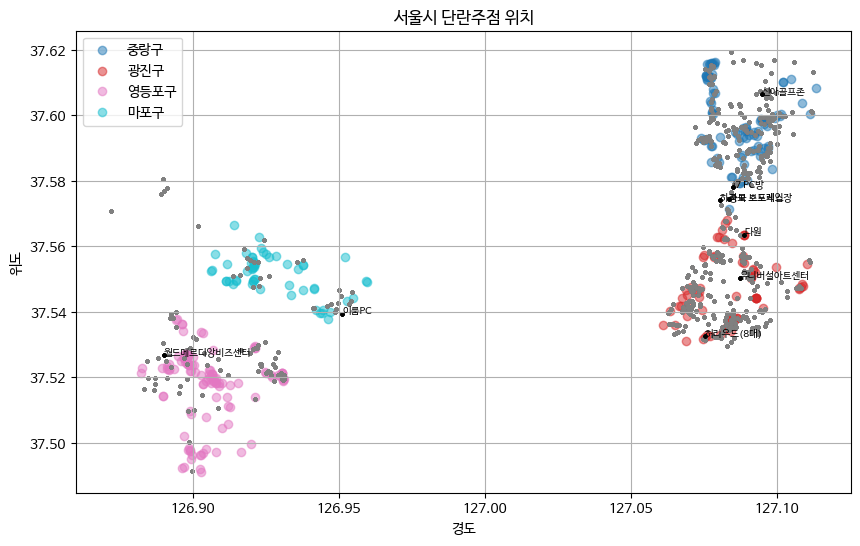

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for idx, i in enumerate(구):
  특정구 = 특정구_단란주점[특정구_단란주점['자치구'] == i]
  plt.scatter(특정구['경도'], 특정구['위도'], c= colors(idx), alpha=0.5, label = i)
# for idx, row in 특정구_단란주점.iterrows():
#     plt.text(row['경도'], row['위도'], row['자치구'], fontsize=5)

for row in 특정구_흡연구역.iterrows():
  plt.scatter(특정구_흡연구역['경도'], 특정구_흡연구역['위도'], c='gray', s = 3)

for row in 거리50이내흡연구역.iterrows():
  plt.scatter(거리50이내흡연구역['경도'], 거리50이내흡연구역['위도'], c='black', s = 3)
  plt.text(row[1]['경도'], row[1]['위도'], row[1]['설치위치'], fontsize=7)

plt.xlabel('경도')
plt.ylabel('위도')
plt.title('서울시 단란주점 위치')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
거리50이내흡연구역 = pd.read_csv('__거리_50m_이내_구역.csv')
거리50이내흡연구역

,자치구,설치위치,주소,위도,경도,시설형태,위경도,학교명,주소.1,위도.1,경도.1,자치구.1,위경도.1,거리
0,중랑구,중곡 스포렉스,서울특별시 중랑구 면목로23길 20 (면목동),37.574357,127.083639,NaN,"[37.5743574, 127.0836385]",서울중곡초등학교,서울특별시 중랑구 면목로23길 20,37.574361,127.083530,중랑구,"[37.57436078, 127.0835305]",9.525343
1,광진구,허리우드(8대),"서울특별시 광진구 자양번영로 33 (자양동, 성보빌딩)",37.532669,127.075258,완전폐쇄형,"[37.5326691, 127.075258]",자양어린이집,서울특별시 광진구 자양번영로 35 (자양동),37.532877,127.075234,광진구,"[37.532877, 127.0752337]",23.216516
2,광진구,다원,"서울특별시 광진구 능동로 391, 지층 (중곡동)",37.563544,127.088830,완전폐쇄형,"[37.563544, 127.0888304]",대원외국어고등학교,서울특별시 광진구 용마산로22길 26,37.563617,127.089170,광진구,"[37.5636165, 127.0891701]",31.008021
3,중랑구,i7 PC방,서울특별시 중랑구 면목동 665-3번지,37.578200,127.085030,NaN,"[37.5781997, 127.0850301]",동일유치원,서울특별시 중랑구 면목로35길 21,37.578147,127.084613,중랑구,"[37.57814651, 127.084613]",37.229501
4,마포구,이룸PC,서울특별시 마포구 도화4길 37,37.539489,126.951135,폐쇄형,"[37.5394893, 126.9511346]",삼성그린유치원,서울특별시 마포구 도화4길 62,37.539503,126.951590,마포구,"[37.53950336, 126.9515902]",40.200747
5,중랑구,하라보 보드게임장,서울특별시 중랑구 면목로27길 92 지하,37.574266,127.080535,NaN,"[37.5742658, 127.0805347]",이화어린이집,서울특별시 중랑구 면목로27길 85,37.573952,127.080811,중랑구,"[37.573952, 127.080811]",42.549348
6,영등포구,월드메르디앙비즈센터,서울특별시 영등포구 양산로 53 (양평동3가),37.526911,126.890146,개방형,"[37.5269111, 126.8901455]",서울당중초등학교,서울특별시 영등포구 선유로 131,37.526519,126.889994,영등포구,"[37.52651876, 126.889994]",45.626071
7,광진구,유니버설아트센터,서울특별시 광진구 천호대로 664,37.550395,127.087338,완전 폐쇄형,"[37.5503951, 127.087338]",선화예술고등학교,서울특별시 광진구 천호대로 664,37.550103,127.087703,광진구,"[37.55010302, 127.0877027]",45.700077
8,중랑구,신아골프존,"서울특별시 중랑구 봉화산로 194 (신내동,신아타운(1202호))",37.606425,127.094729,NaN,"[37.6064252, 127.0947293]",예원유치원,서울특별시 중랑구 신내로51,37.605976,127.094727,중랑구,"[37.6059759, 127.0947267]",49.960406


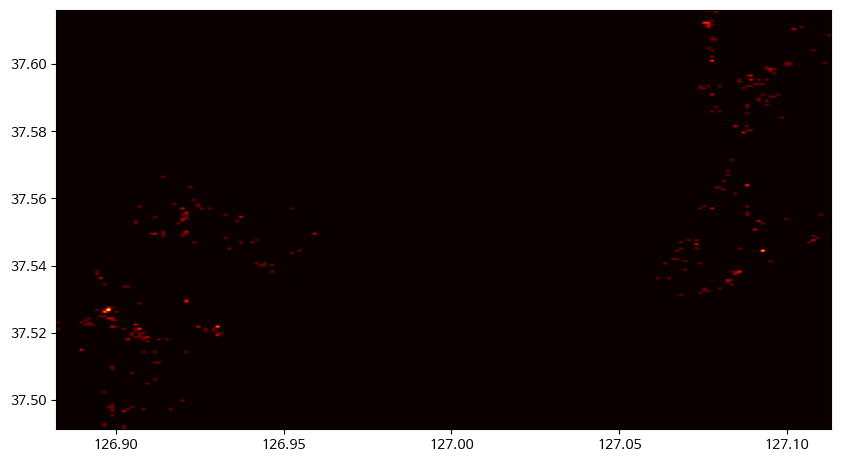

In [ ]:
lat_min, lat_max = 특정구_단란주점['위도'].min(), 특정구_단란주점['위도'].max()
lon_min, lon_max = 특정구_단란주점['경도'].min(), 특정구_단란주점['경도'].max()
lat_bins = np.linspace(lat_min, lat_max, 200)
lon_bins = np.linspace(lon_min, lon_max, 200)

heatmap, xedges, yedges = np.histogram2d(특정구_단란주점['경도'], 특정구_단란주점['위도'], bins=[lon_bins, lat_bins])

plt.figure(figsize=(10, 12))
plt.imshow(heatmap.T, extent=[lon_min, lon_max, lat_min, lat_max], origin='lower', cmap='hot')
plt.show()

1. 단란주점에서 밀집도가 높으며,
2. 어린이보호구역과의 거리가 충분히 떨어져있고,
3. 기존 흡연구역과의 거리가 적당한 새로운 흡연구역 후보 선정

In [ ]:
heatmap_flat = heatmap.flatten()
max_density_indices = heatmap_flat.argsort()[::-1]
max_density_indices

np.unravel_index(heatmap.argmax(), heatmap.shape)

(13, 56)

In [ ]:
어린이집_초중고 = pd.read_csv('어린이집_초중고_전체데이터.csv')
np.sort(heatmap_flat)[::-1][:10]

array([9., 7., 6., 6., 6., 5., 5., 5., 4., 4.])

In [ ]:
# from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors

knn_기존흡연구역 = NearestNeighbors(n_neighbors=1, metric='haversine')
knn_어린이집_초중고 = NearestNeighbors(n_neighbors=1, metric='haversine')


기존흡연구역_radian = np.radians(특정구_흡연구역[['위도', '경도']]).values
어린이집_초중고_radian = np.radians(어린이집_초중고[['위도', '경도']]).values

knn_기존흡연구역.fit(기존흡연구역_radian)
knn_어린이집_초중고.fit(어린이집_초중고_radian)


heatmap_flat = heatmap.flatten()
max_density_indices = heatmap_flat.argsort()[::-1]
# print(max_density_indices)
new_smoking_areas = []

for idx in max_density_indices:
  max_density_coords = np.unravel_index(idx, heatmap.shape)
  print(max_density_coords)
  lat_center = (lat_bins[max_density_coords[1]] + lat_bins[max_density_coords[1]+1]) / 2
  lon_center = (lon_bins[max_density_coords[0]] + lon_bins[max_density_coords[0]+1]) / 2

  new = (lat_center, lon_center)
  new_radians = np.radians(new).reshape(1,-1)
  dist_from_기존흡연구역 = knn_기존흡연구역.kneighbors(new_radians)
  dist_from_어린이집_초중고 = knn_어린이집_초중고.kneighbors(new_radians)


  new_smoking_areas.append({
      '밀집도': heatmap[max_density_coords],
      'new' : new,
      '흡연구역' : dist_from_기존흡연구역[0][0][0] * 6371000,
      '어린이집': dist_from_어린이집_초중고[0][0][0] * 6371000
      })

  if len(new_smoking_areas) >= 20:
      break

a = pd.DataFrame(new_smoking_areas)
a

(13, 56)
(181, 84)
(41, 48)
(12, 55)
(33, 60)
(168, 198)
(168, 174)
(177, 115)
(167, 192)
(166, 192)
(21, 47)
(175, 74)
(167, 198)
(20, 49)
(13, 52)
(6, 37)
(174, 143)
(179, 94)
(25, 92)
(66, 92)


,밀집도,new,흡연구역,어린이집
0,7.0,"(37.526698325376884, 126.89796754120604)",119.699105,197.032275
1,5.0,"(37.544284815829144, 127.09289160954773)",189.286687,391.579063
2,4.0,"(37.5216736138191, 126.93045488592966)",33.098715,416.137113
3,4.0,"(37.52607023643216, 126.89680727889447)",35.587322,166.776730
4,3.0,"(37.52921068115578, 126.9211727874372)",25.399043,234.343553
5,3.0,"(37.615886955527635, 127.0778081994975)",58.019190,147.819086
6,3.0,"(37.60081282085427, 127.0778081994975)",44.793834,259.753792
7,3.0,"(37.56375557311558, 127.0882505603015)",56.262726,82.511768
8,3.0,"(37.61211842185929, 127.07664793718592)",21.927367,419.447303
9,3.0,"(37.61211842185929, 127.07548767487438)",117.701374,363.235542


<ipython-input-240-36e6e278e5e6>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(특정구['경도'], 특정구['위도'], c= colors(idx), alpha=0.5, label = i)


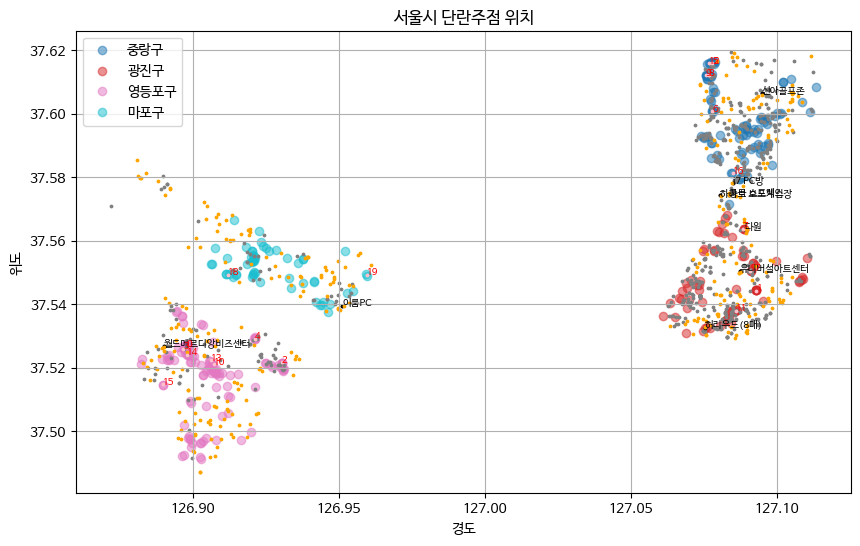

In [ ]:
import matplotlib.pyplot as plt
특정구_어린이집_초중고 = 어린이집_초중고[어린이집_초중고['자치구'].isin(구)]

plt.figure(figsize=(10, 6))

for idx, i in enumerate(구):
  특정구 = 특정구_단란주점[특정구_단란주점['자치구'] == i]
  plt.scatter(특정구['경도'], 특정구['위도'], c= colors(idx), alpha=0.5, label = i)
# for idx, row in 특정구_단란주점.iterrows():
#     plt.text(row['경도'], row['위도'], row['자치구'], fontsize=5)

plt.scatter(특정구_흡연구역['경도'], 특정구_흡연구역['위도'], c='gray', s = 3)
plt.scatter(거리50이내흡연구역['경도'], 거리50이내흡연구역['위도'], c='black', s = 3)

for row in 거리50이내흡연구역.iterrows():
  plt.text(row[1]['경도'], row[1]['위도'], row[1]['설치위치'], fontsize=7)

plt.scatter(특정구_어린이집_초중고['경도'], 특정구_어린이집_초중고['위도'], c = 'orange', s = 3)

### new ###
new_위도 = a['new'].apply(lambda x: x[0])
new_경도 = a['new'].apply(lambda x: x[1])
plt.scatter(new_경도, new_위도, c = 'pink', s = 3)

for idx,row in enumerate(zip(new_경도, new_위도)):
  plt.text(row[0], row[1], idx, fontsize=7, color='red')

plt.xlabel('경도')
plt.ylabel('위도')
plt.title('서울시 단란주점 위치')
plt.legend()
plt.grid(True)
plt.show()